## Chapter 4. 분류

### 01. 분류(Classification)의 개요 

지도학습은 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식.<br>
기존 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 뒤에 새롭게 관측된 데이터에 대한 레이블을 판별하는 것.

분류는 다양한 머신러닝 알고리즘으로 구현할 수 있다.
- 베이즈(Bayes) 통계와 생성 모델에 기반한 나이브 베이즈(Naive Bayes)
- 독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀(Logistic Regression)
- 데이터 균일도에 따른 규칙 기반의 결정 트리(Decision Tree)
- 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신(Support Vector Machine)
- 근접 거리를 기준으로 하는 최소 근접(Nearest Neighbor)알고리즘
- 심층연결 기반의 신경망(Neural Network)
- 서로 다른(또는 같은) 머신러닝 알고리즘을 결합한 앙상블(Ensemble)

### 02. 결정 트리

결정 트리(Decision Tree)는 ML 알고리즘 중 직관적으로 이해하기 쉬운 알고리즘.<br> 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의
분류 규칙을 만드는 것.

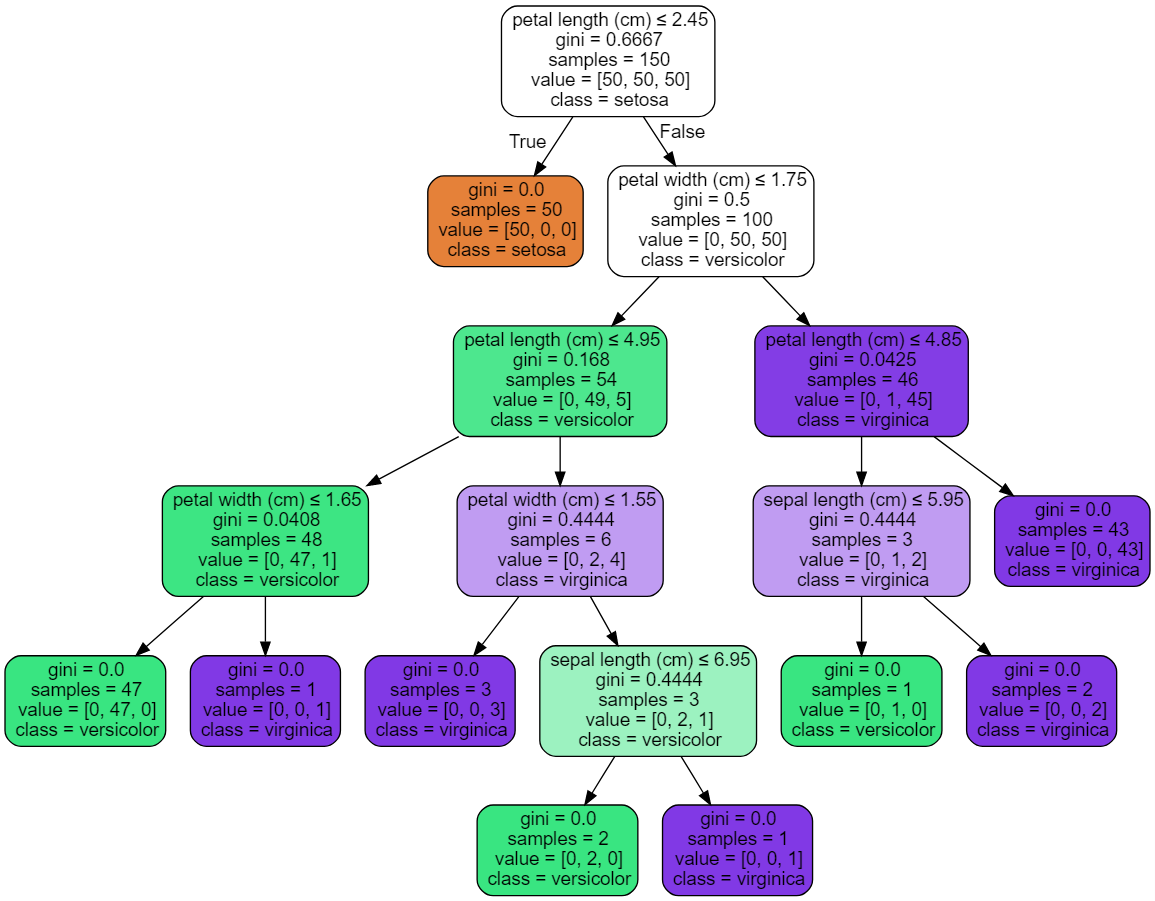

규칙 노드로 표시된 노드는 규칙 조건이 되는 것이고, 리프 노드로 표시된 노드는 결정된 클래스 값.<br>
트리 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다.<br>
가능한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에<br>
속할 수 있도록 결정 노드의 규칙이 정해져야 한다.

이러한 정보의 균일도를 측정하는 대표적인 방법은 엔트로피를 이용한 정보 이득(Information Gain)지수와 지니 계수가 있음.

<b>엔트로피</b> : 주어진 데이터의 혼잡도를 의미하는데, 서로 다른 값이 섞여 있으면 엔트로피가 높고, <br>같은 값이 섞여 있으면 엔트로피가 낮다.

정보 이득 지수는 1에서 엔트로피 값을 뺀 값. => 1 - 엔트로피 지수<br>
정보 이득 지수가 높은 속성을 기준으로분할.

지니 계수가 낮을수록 데이터가 균일도가 높은 것으로 해석해 지니 계수가 낮은 속성을 기준으로 분할.

#### 결정 트리 모델의 특징

<b>결정 트리 장점</b>
- 쉽다. 직관적이다.
- 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않다.

<b>결정 트리 단점</b>
- 과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요.

#### 결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 피처 이름 index와 피처명이 공백으로 분리되어 있음
feature_name_df = pd.read_csv('./data/human_activity/features.txt', sep='\s+',header=None, names=['column_index','column_name'])
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [14]:
feature_dup_df = feature_name_df.groupby('column_name').count()
# 컬럼명이 중복되는 컬럼수
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [22]:
feature_dup_df[feature_dup_df['column_index'] > 1]

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3
"fBodyAcc-bandsEnergy()-25,32",3
"fBodyAcc-bandsEnergy()-25,48",3
"fBodyAcc-bandsEnergy()-33,40",3
"fBodyAcc-bandsEnergy()-33,48",3


In [32]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(),feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x:x[0] + '_' + str(x[1]) if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [40]:
def get_human_dataset():
    feature_df = pd.read_csv('./data/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
    new_feature_df = get_new_feature_name_df(feature_df)
    
    feature_name = new_feature_df['column_name'].values.tolist()
    
    X_train = pd.read_csv('./data/human_activity/train/X_train.txt', sep='\s+', names = feature_name)
    X_test = pd.read_csv('./data/human_activity/test/X_test.txt', sep='\s+', names = feature_name)
    
    y_train = pd.read_csv('./data/human_activity/train/y_train.txt', sep='\s+', header=None, names = ['action'])
    y_test = pd.read_csv('./data/human_activity/test/y_test.txt', sep='\s+', header=None, names = ['action'])
    
    return X_train, X_test, y_train, y_test
    

In [41]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [42]:
print('학습 피처 데이터셋 info()')
print(X_train.info())

학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [45]:
print('학습 피처 레이블 분포')
print(y_train.value_counts())

학습 피처 레이블 분포
action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
dtype: int64


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print('결정 트리 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('결정 트리 기본 하이퍼 파라미터 : ', dt_clf.get_params())

결정 트리 정확도 : 0.8622
결정 트리 기본 하이퍼 파라미터 :  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [54]:
# 결정 트리의 트리 깊이(max_depth)에 따른 예측 정확도
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, cv=5, scoring='accuracy', verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 베스트 스코어 : {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터 : ',grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 베스트 스코어 : 0.8479
GridSearchCV 최적 하이퍼 파라미터 :  {'max_depth': 8}


결정 트리는 더 완벽한 규칙을 학습 데이터 세트에 적용하기 위해 노드를 지속적으로 분할하면서 깊이가 깊어지고 복잡한 모델이 됨.<br>
깊어진 트리는 학습 데이터에는 올바른 예측 결과를 가져올지 모르지만, 검증 데이터 세트에는 오히려 과적합으로 인한 성능 저하를 유발하 수 있음.

In [52]:
max_depths = [6, 8, 10, 12, 16, 20, 24]

for max_depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth = max_depth, random_state=42)
    dt_clf.fit(X_train, y_train)
    y_pred = dt_clf.predict(X_test)
    print('max_depth:{0}, 정확도 : {1:.4f}'.format(max_depth, accuracy_score(y_test, y_pred)))

max_depth:6, 정확도 : 0.8544
max_depth:8, 정확도 : 0.8683
max_depth:10, 정확도 : 0.8626
max_depth:12, 정확도 : 0.8643
max_depth:16, 정확도 : 0.8595
max_depth:20, 정확도 : 0.8622
max_depth:24, 정확도 : 0.8622


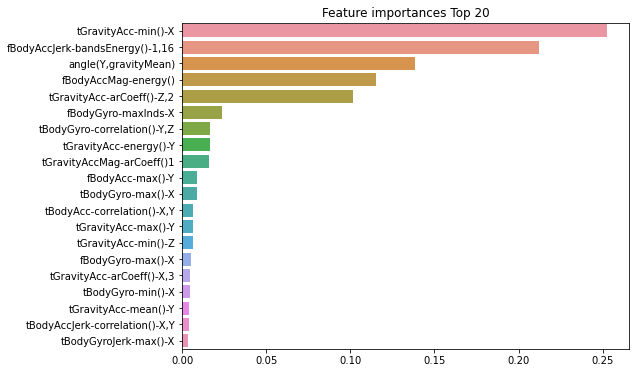

In [55]:
# Top 20 피처 중요도
import seaborn as sns
import matplotlib.pyplot as plt

ftr_importances_values = grid_cv.best_estimator_.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8, 6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### 앙상블 학습

앙상블 학습(Ensemble Learning)을 통한 분류는 여러 개의 분류기(Classifer)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을
도출하는 기법

XGBoost, LightGBM, 스태킹(Stacking)을 포함해 다양한 유형의 앙상블 알고리즘이 인기를 모으고 있다.<br>
앙상블 학습의 유형은 전통적으로 보팅, 배깅, 부스팅의 세 가지로 나눌 수 있으며, 이외에도 스태킹을 포함한 다양한 앙상블 방법이 있다.<br>
보팅과 배깅은 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식.<br>

<b>보팅과 배깅의 차이점</b><br>
보팅 : 서로 다른 알고리즘을 가진 분류기를 결합 투표<br>
배깅 : 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 투표

<b>부스팅</b>은 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록
다음 분류기에는 가중치를 부여하면서 학습과 예측을 진행하는 것.

<b>스태킹</b>은 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어서 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법.

#### 보팅 유형 - 하드 보팅(Hard Voting)과 소프트 보팅(Soft Voting)

보팅 방법에는 하드 보팅과 소프트 보팅 두 가지가 있다.<br>

하드 보팅 : 예측한 결과값들중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정<br>
소프트 보팅 : 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정

#### 보팅 분류기(Voting Classifier)

In [62]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import pandas as pd

cancer = load_breast_cancer()

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

print('유방암 데이터 프레임')
print(cancer_df.head())

lr_clf = LogisticRegression(random_state=42)
knn_clf = KNeighborsClassifier(n_neighbors=8)

vote_clf = VotingClassifier(estimators=[('LR',lr_clf), ('KNN', knn_clf)], voting='hard', verbose=1)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=42)

vote_clf.fit(X_train, y_train)
y_pred = vote_clf.predict(X_test)

print('보팅 분류기 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

유방암 데이터 프레임
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \


C:\Users\jysul\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
# 개별 모델의 정확도 평가
classifiers = [lr_clf, knn_clf]

for classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('모델 이름 : {0}, 정확도 : {1:.4f}'.format(class_name, accuracy_score(y_test, y_pred)))

모델 이름 : LogisticRegression, 정확도 : 0.9561
모델 이름 : KNeighborsClassifier, 정확도 : 0.9561


C:\Users\jysul\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 04. 랜덤 포레스트

#### 랜덤 포레스트 개요 및 실습

배깅은 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘.<br>
배깅의 대표적인 알고리즘은 랜덤포레스트

랜덤 포레스트는 개별적인 분류기의 기반 알고리즘은 결정 트리이지만 개별 트리가 학습하는 데이터 세트는 전체 데이터에서<br>
일부가 중첩되게 샘플링된 데이터 세트.<br>
이렇게 여러 개의 데이터 세트를 중첩되게 분리하는 것을 부트스트래핑(bootstrapping)분할 방식이라고 함.<br>
배깅(Bagging)의 약자가 Bootstrapping aggregating의 줄임말.<br>

In [70]:
# 사용자 행동 데이터 세트
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

랜덤 포레스트 정확도 : 0.9257


### 05. GBM(Gradient Boosting Machine)

#### GBM의 개요 및 실습

부스팅 알고리즘은 여러 개의 약한 학습기를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식.

부스팅의 대표적인 구현은 AdaBoost와 그래디언트 부스트가 있다.<br>

AdaBoost : 오류 데이터에 가중치를 부여하면서 부스팅을 수행<br>
그래디언트 부스트 : 가중치 업데이트를 경사 하강법(Gradient Descent)을 이용<br>

경사 하강법 : 오류값을 최소화하는 방향성을 가지고 반복적으로 가중치 값을 업데이트 하는 것.

In [71]:
# 사용자 행동 데이터 세트
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

import time

import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()
gb_clf = GradientBoostingClassifier(random_state=42)

start_time = time.time()
gb_clf.fit(X_train, y_train)
end_time = time.time()
print('그래디언트 부스팅 학습 시간 : {0:.2f}'.format(end_time - start_time))
y_pred = gb_clf.predict(X_test)
print('그래디언트 부스팅 정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))

그래디언트 부스팅 학습 시간 : 1079.20
그래디언트 부스팅 정확도 : 0.9386


### 06. XGBoost(eXtra Gradient Boost)

#### XGBoost 개요

XGBoost는 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나이다.<br>
GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제를 해결해서 매우 각광을 받고 있다.

In [76]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train ,y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3, random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
y_proba = xgb_clf.predict_proba(X_test)[:, 1]

print('오차행렬')
print(confusion_matrix(y_test, y_pred))
print('정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('정밀도 : {0:.4f}'.format(precision_score(y_test, y_pred)))
print('재현율 : {0:.4f}'.format(recall_score(y_test, y_pred)))
print('f1스코어 : {0:.4f}'.format(f1_score(y_test, y_pred)))
print('auc : {0:.4f}'.format(roc_auc_score(y_test, y_proba)))

[15:17:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차행렬
[[41  2]
 [ 1 70]]
정확도 : 0.9737
정밀도 : 0.9722
재현율 : 0.9859
f1스코어 : 0.9790
auc : 0.9941


#### 피처 중요도

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

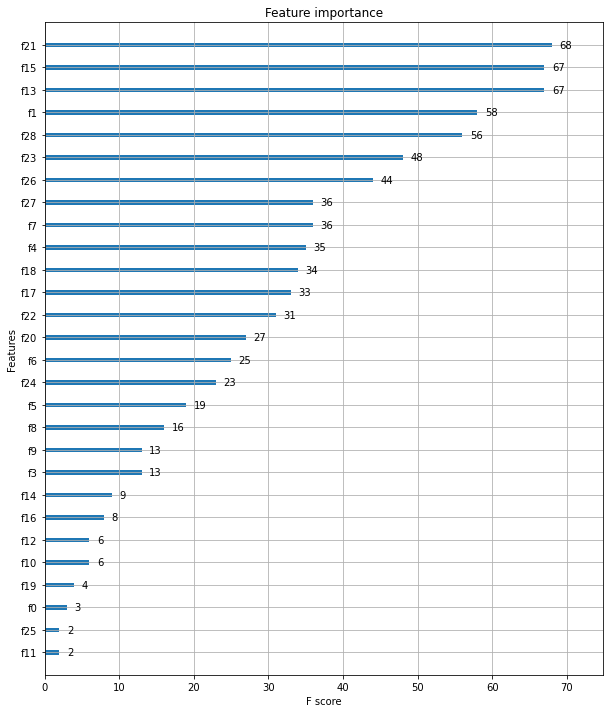

In [77]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_clf, ax=ax)

### 07. LightGBM

LightGBM의 가장 큰 장점은 XGBoost보다 학습에 걸리는 시간이 훨씬 적다는 점.<br>
단점은 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉽다는 것인데,<br>
적은 데이터의 기준은 애매하지만, 일반적으로 10,000건 이하의 데이터 세트라고 LightGBM의 공식 문서에서 기술하고 있다.

#### LightGBM 적용 - 위스콘신 유방암 예측

In [79]:
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

eval = [(X_test, y_test)]

lgbm_clf = LGBMClassifier(n_estimators=400, random_state=42)
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_set=eval, eval_metric='logloss', verbose=True)
y_pred = lgbm_clf.predict(X_test)
y_proba = lgbm_clf.predict_proba(X_test)[:,1]

print('오차행렬')
print(confusion_matrix(y_test, y_pred))
print('정확도 : {0:.4f}'.format(accuracy_score(y_test, y_pred)))
print('정밀도 : {0:.4f}'.format(precision_score(y_test, y_pred)))
print('재현율 : {0:.4f}'.format(recall_score(y_test, y_pred)))
print('f1스코어 : {0:.4f}'.format(f1_score(y_test, y_pred)))
print('auc : {0:.4f}'.format(roc_auc_score(y_test, y_proba)))

[1]	valid_0's binary_logloss: 0.588284
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.525044
[3]	valid_0's binary_logloss: 0.473098
[4]	valid_0's binary_logloss: 0.432445
[5]	valid_0's binary_logloss: 0.393757
[6]	valid_0's binary_logloss: 0.358826
[7]	valid_0's binary_logloss: 0.328248
[8]	valid_0's binary_logloss: 0.304146
[9]	valid_0's binary_logloss: 0.283869
[10]	valid_0's binary_logloss: 0.265547
[11]	valid_0's binary_logloss: 0.244191
[12]	valid_0's binary_logloss: 0.229185
[13]	valid_0's binary_logloss: 0.217378
[14]	valid_0's binary_logloss: 0.204076
[15]	valid_0's binary_logloss: 0.193684
[16]	valid_0's binary_logloss: 0.183553
[17]	valid_0's binary_logloss: 0.17687
[18]	valid_0's binary_logloss: 0.171215
[19]	valid_0's binary_logloss: 0.162097
[20]	valid_0's binary_logloss: 0.15511
[21]	valid_0's binary_logloss: 0.151133
[22]	valid_0's binary_logloss: 0.146962
[23]	valid_0's binary_logloss: 0.142177
[24]	valid_0's binary_logloss

#### 피처 중요도

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

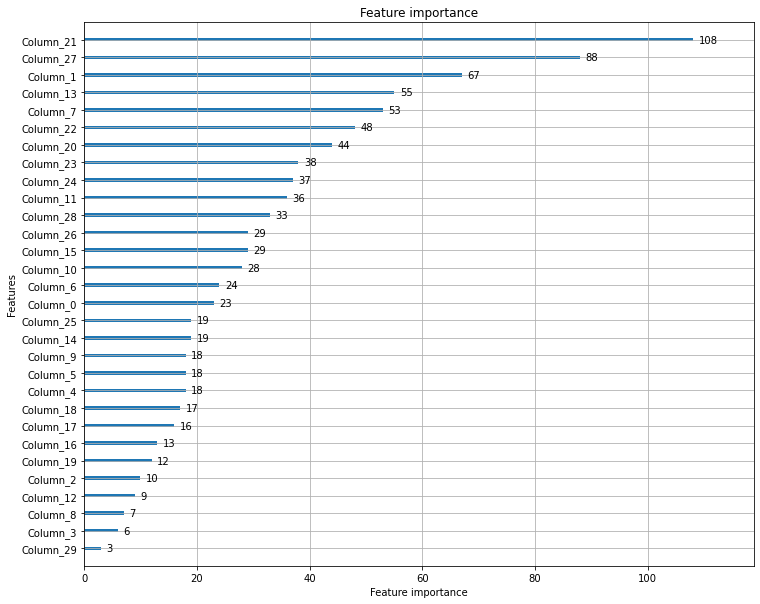

In [80]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(12, 10))
plot_importance(lgbm_clf, ax=ax)

### 08. 스태킹 앙상블

스태킹(Stacking)은 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행하는 것.<br>
스태킹을 적용할 때는 많은 개별 모델이 필요하다. <br>
2 ~ 3개의 개별 모델만을 결합해서는 쉽게 에측 성능을 향상시킬 수 없으며, 스태킹을 적용한다고 해서<br>
반드시 성능 향상이 되리라는 보장도 없음.

In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# 데이터 로드
X,y = load_breast_cancer(return_X_y=True)
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_y_pred = knn_clf.predict(X_test)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)

ada_clf = AdaBoostClassifier(random_state=42)
ada_clf.fit(X_train, y_train)
ada_y_pred = ada_clf.predict(X_test)

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
dt_y_pred = dt_clf.predict(X_test)

print('KNN 정확도 : {0:.4f}'.format(accuracy_score(y_test, knn_y_pred)))
print('RandomForest 정확도 : {0:.4f}'.format(accuracy_score(y_test, rf_y_pred)))
print('AdaBoost 정확도 : {0:.4f}'.format(accuracy_score(y_test, ada_y_pred)))
print('결정 트리 정확도 : {0:.4f}'.format(accuracy_score(y_test, dt_y_pred)))

KNN 정확도 : 0.9561
RandomForest 정확도 : 0.9649
AdaBoost 정확도 : 0.9737
결정 트리 정확도 : 0.9474


In [88]:
# 각 알고리즘에서 나온 예측 결과를 학습 데이터로 만들기 위해 배열로 저장
pred = np.array([knn_y_pred, rf_y_pred, ada_y_pred, dt_y_pred])
print(pred.shape)
# 행과 열을 바꿔줌
pred = np.transpose(pred)
print(pred.shape)

# 스태킹 적용할 메타 모델 : LogisticRegression
lr_clf = LogisticRegression(random_state=42)
lr_clf.fit(pred, y_test)
final_y_pred = lr_clf.predict(pred)

print('최종 메타 모델 정확도 : {0:.4f}'.format(accuracy_score(y_test, final_y_pred)))

(4, 114)
(114, 4)
최종 메타 모델 정확도 : 0.9649


이러한 스태킹 기법으로 예측을 한다고 무조건 개별 모델보다는 좋아진다는 보장이 없음.